In [95]:
import os
import sys
import time
import numpy as np
import skimage
from matplotlib import pyplot as plt
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import ShuffleSplit


In [96]:
test = np.loadtxt("archive/fashion-mnist_test.csv", delimiter=',', skiprows=1)
train = np.loadtxt("archive/fashion-mnist_train.csv",
                   delimiter=',', skiprows=1)

test = test[1:]
train = train[1:]

data = np.vstack((train, test))

X = data[:, 1:]
y = data[:, 0]

X = np.array(X)
y = np.array(y, dtype=np.uint8)


print(X.shape, y.shape)


(69998, 784) (69998,)


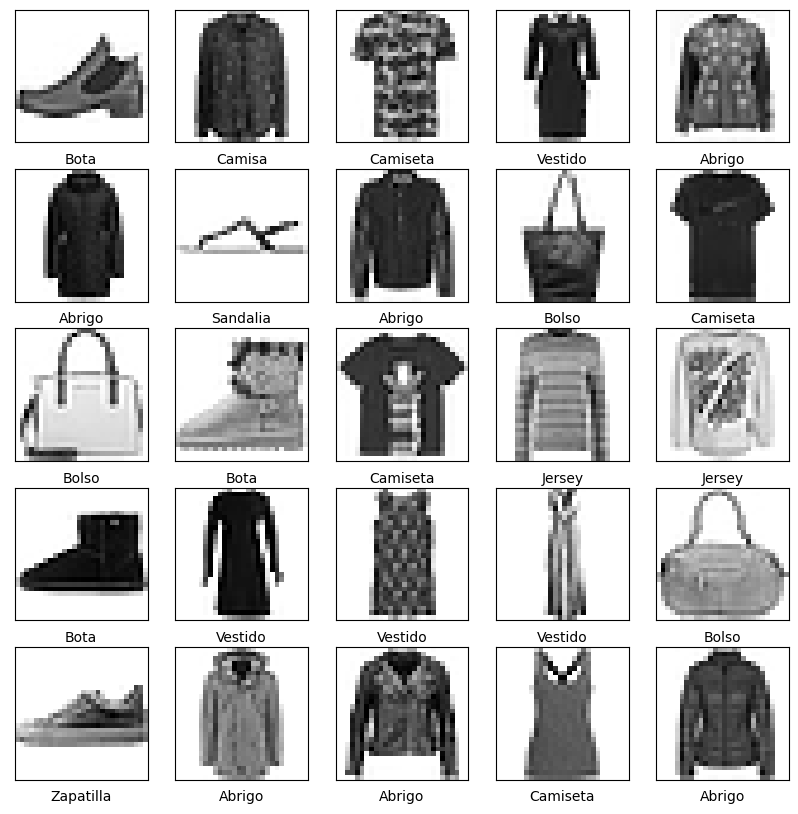

In [97]:
clases = ['Camiseta', 'Pantalon', 'Jersey', 'Vestido',
          'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(clases[int(y[i])])
plt.show()


In [98]:

rs = ShuffleSplit(n_splits=10, test_size=.20, random_state=0)
for train_index, test_index in rs.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]


print("SHAPE Xtrain", X_train.shape)
print("SHAPE y_train", y_train.shape)
print("SHAPE X_test", X_test.shape)
print("SHAPE y_test", y_test.shape)


SHAPE Xtrain (55998, 784)
SHAPE y_train (55998,)
SHAPE X_test (14000, 784)
SHAPE y_test (14000,)


In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

startTimer = time.perf_counter()

C_values = [0.1, 1.0, 5.0, 7.5, 10.0]
gamma_values = [0.001, 0.01, 0.1, 1, 10]

# Genera el diccionario param_grid con los valores indicados
param_grid = {'C': C_values, 'gamma': gamma_values}

# Genera el objeto ShuffleSplit para generar un único particionado fijo, con 20% de datos de validación y
# random_state = 0
rs = ShuffleSplit(n_splits=1, test_size=.20, random_state=0)

# Haz la llamada a la función GridSearchCV con un clasificador SVC y el diccionario de parámetros definido
# Para acelerar algo el entrenamiento, emplea también el parámetro n_jobs=-1, que hará que se aproveche mejor el
# procesador de tu equipo.
clasificadores = GridSearchCV(svm.SVC(), param_grid, n_jobs=-1, cv=rs)

# Entrena el modelo interno de GridSearchCV, y después obten los mejores valores de C y gamma en C_best y gamma_best
clasificadores.fit(X_train, y_train)

C_best = clasificadores.best_params_["C"]
gamma_best = clasificadores.best_params_["gamma"]

print("Mejores parámetros C: {}, gamma: {}".format(C_best, gamma_best))

# Crea y entrena un modelo SVC con C_best y gamma_best sobre los datos de train originales (X e y)
clf = svm.SVC(C=C_best, gamma=gamma_best)
clf.fit(X_train, y_train)

# Realizamos predicciones con el clasificador entrenado
y_pred = clf.predict(X_test)

# Calculamos el porcentaje de acierto
accuracy = np.mean(y_pred == y_test)
print("Precisión: {:.2f}%".format(accuracy * 100))

# Detenemos el contador de tiempo
endTimer = time.perf_counter()

# Calculamos el tiempo transcurrido
elapsed = endTimer - startTimer
# Obtenemos el tiempo transcurrido en minutos y segundos
minutes, seconds = divmod(elapsed, 60)

# Mostramos el tiempo transcurrido en minutos y segundos
print(f"Tiempo transcurrido: {minutes:.0f} minutos {seconds:.2f} segundos")


In [91]:
clf = svm.SVC()
clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))


Accuracy: 0.09442857142857143


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1390
           1       0.00      0.00      0.00      1365
           2       0.00      0.00      0.00      1407
           3       0.00      0.00      0.00      1380
           4       0.00      0.00      0.00      1477
           5       0.00      0.00      0.00      1467
           6       0.00      0.00      0.00      1425
           7       0.09      1.00      0.17      1322
           8       0.00      0.00      0.00      1392
           9       0.00      0.00      0.00      1375

    accuracy                           0.09     14000
   macro avg       0.01      0.10      0.02     14000
weighted avg       0.01      0.09      0.02     14000



c:\Users\trene\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\trene\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\trene\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

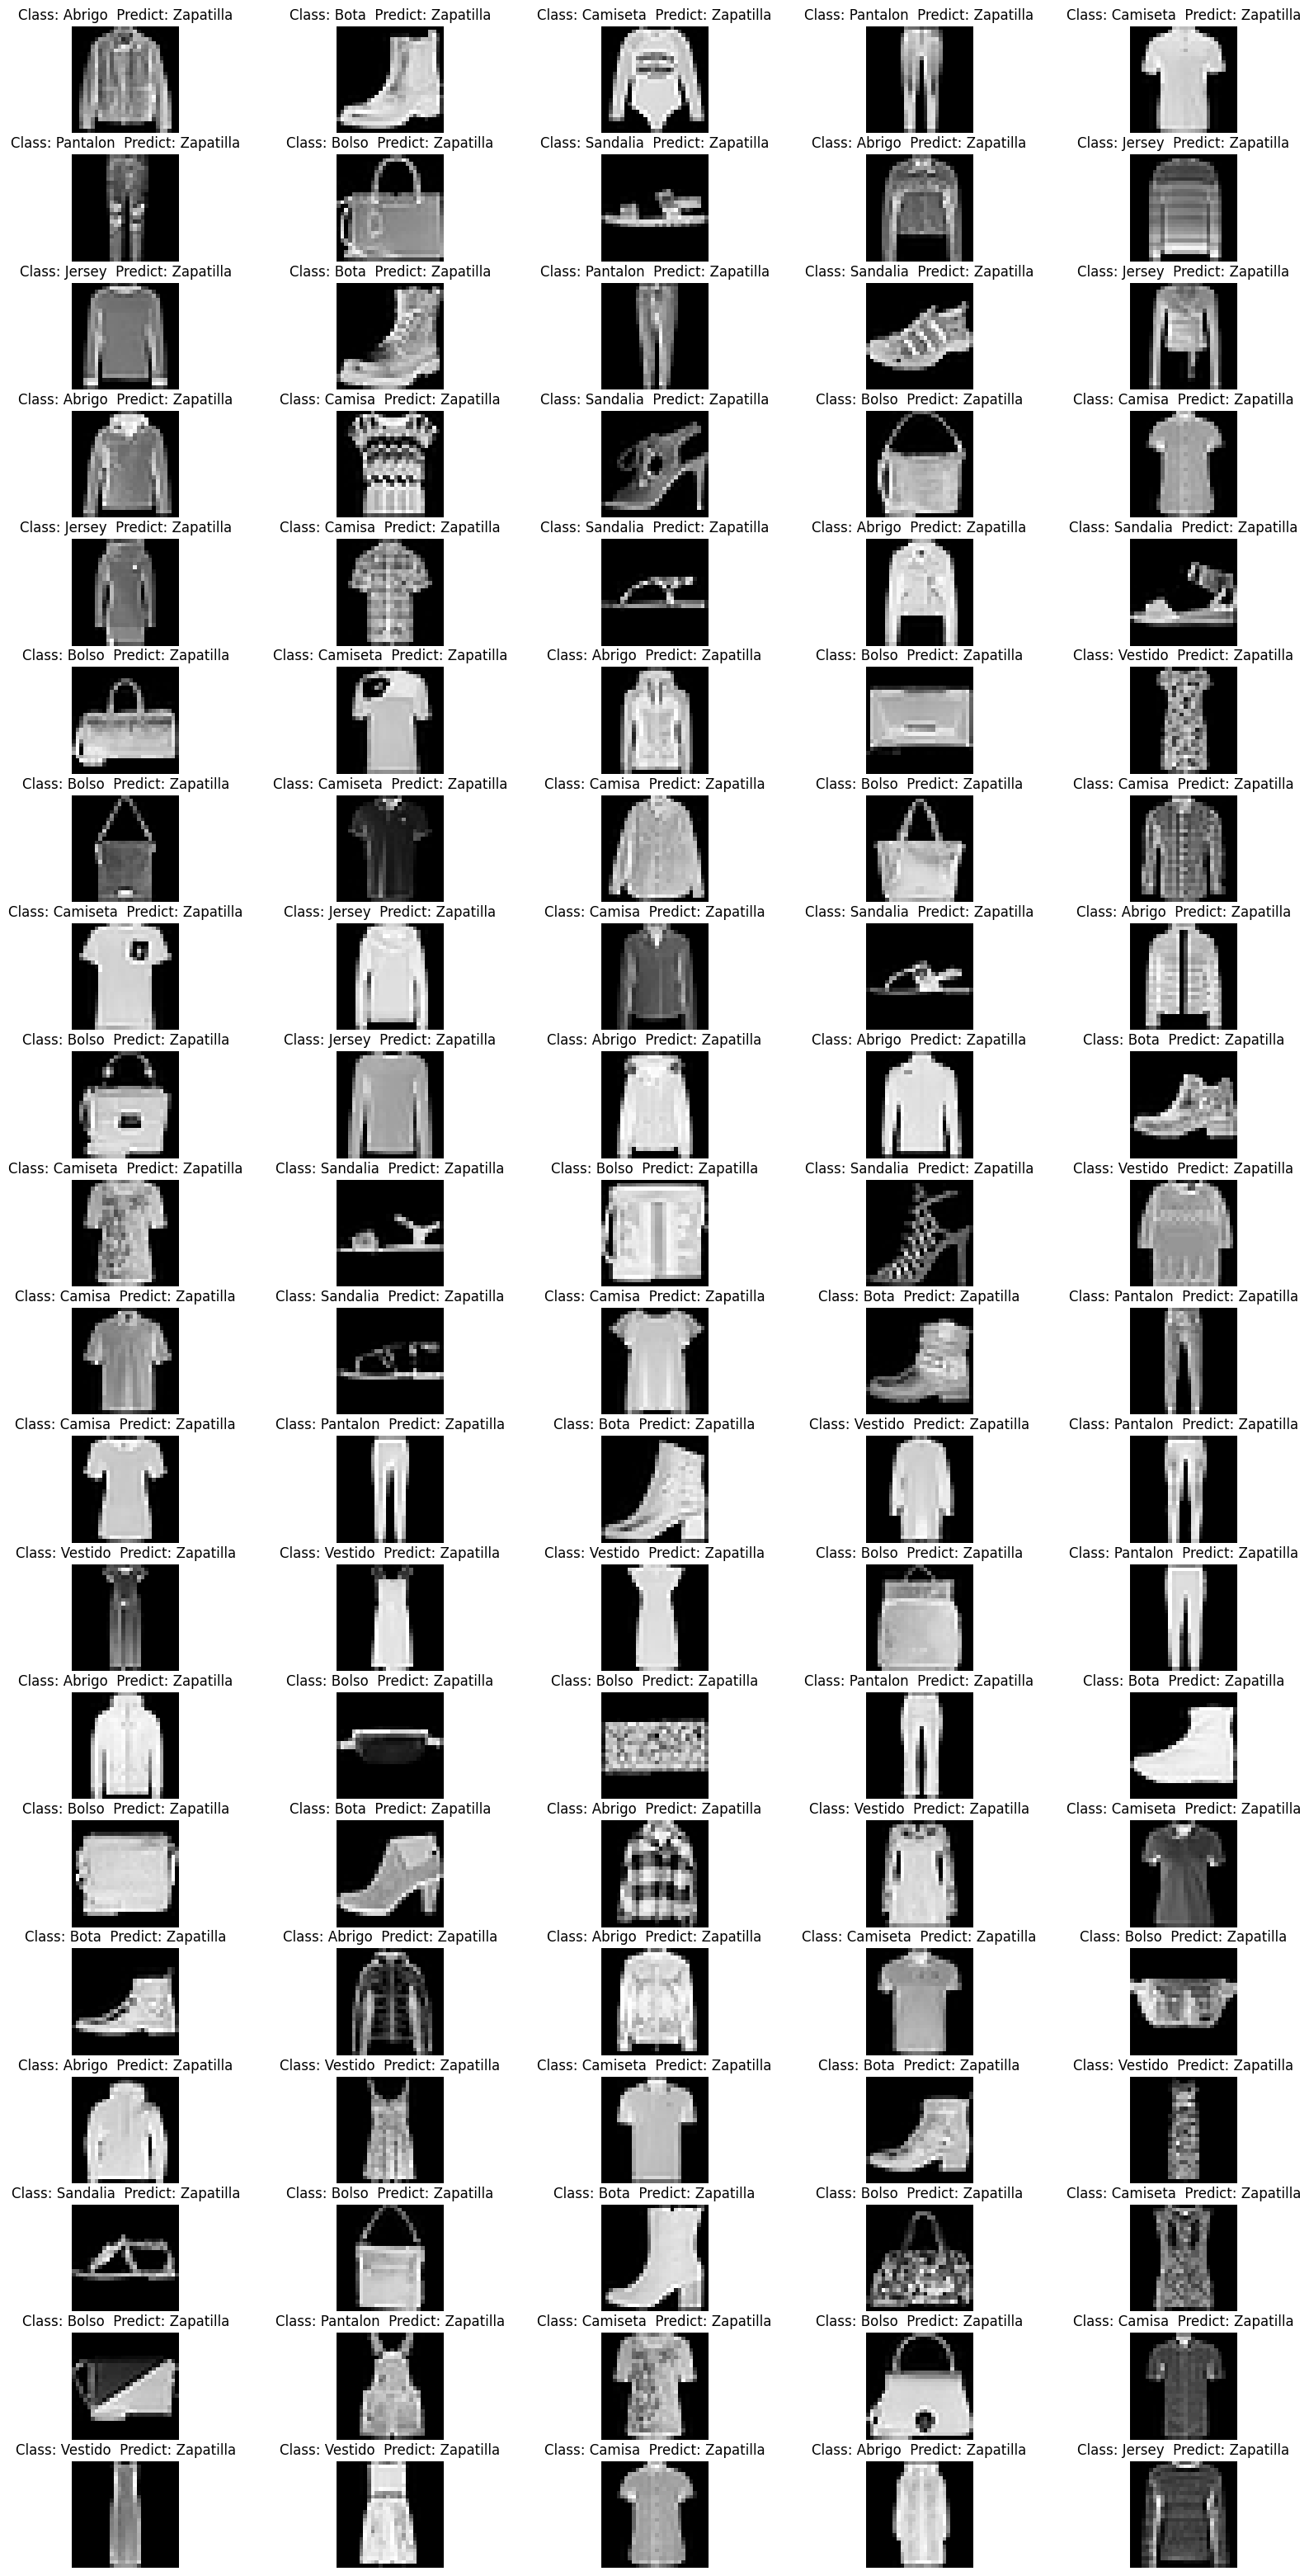

In [92]:
mask = np.array(y_pred != y_test).ravel()
X_mal = X_test[mask]
y_mal = y_test[mask]
y_pred_mal = y_pred[mask]

size = 100
col = 5
row = int(np.ceil(size / col))
fig, axes = plt.subplots(row, col, figsize=(2*2*col, 2*row))

for degree in range(size):
    index = np.random.randint(0, X_mal.shape[0])
    img = X_mal[index, :].reshape(28, 28)
    axes.ravel()[degree].imshow(img, cmap=plt.cm.gray)
    axes.ravel()[degree].set_title(f'Class: {clases[int(y_mal.flat[index])]}  Predict: {clases[int(y_pred_mal.flat[index])]}')
    axes.ravel()[degree].axis('off')

<BarContainer object of 10 artists>

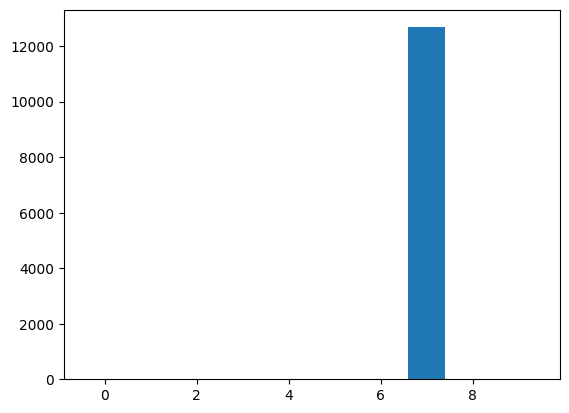

In [93]:
classes = np.arange(10)
valores = np.zeros(10)
for i in range(10):
    valores[i] = np.sum(y_pred[mask]==i)
plt.bar(classes, valores)

In [94]:
from sklearn.neural_network import MLPClassifier

hidden_sizes = range(1, 90, 3)
accuracies = np.zeros(len(hidden_sizes))

for s, size in enumerate(hidden_sizes):
    # Crea el clasificador con size neuronas en la capa oculta.
    # Después entrénalo, y obten la precisión en los datos de entrenamiento.
    # Guarda la precisión final en una variable accTrain.
    clasificador = MLPClassifier(hidden_layer_sizes = size, solver = 'lbfgs', max_iter = 300)
    
    clasificador.fit(X_train,y_train.ravel())
    
    y_pred = clasificador.predict(X_test)
    
    accTrain = accuracy_score(y_pred, y_test)
    
    accuracies[s] = accTrain

# Muestra en una gráfica como ha cambiado el error conforme aumentábamos hidden_sizes
plt.plot(hidden_sizes, accuracies)
plt.xlabel('hidden_sizes');
plt.ylabel('Accuracy');

KeyboardInterrupt: 

In [ ]:
clasificador = MLPClassifier( hidden_layer_sizes=1000, solver='lbfgs', max_iter=1000)

clasificador.fit(X_train, y_train.ravel())

y_pred = clasificador.predict(X_test)

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.09442857142857143


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1390
           1       0.00      0.00      0.00      1365
           2       0.00      0.00      0.00      1407
           3       0.00      0.00      0.00      1380
           4       0.00      0.00      0.00      1477
           5       0.00      0.00      0.00      1467
           6       0.00      0.00      0.00      1425
           7       0.09      1.00      0.17      1322
           8       0.00      0.00      0.00      1392
           9       0.00      0.00      0.00      1375

    accuracy                           0.09     14000
   macro avg       0.01      0.10      0.02     14000
weighted avg       0.01      0.09      0.02     14000



c:\Users\trene\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\trene\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\trene\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo